In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [39]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 0 # 0 for top
bottom['type'] = 1 # 1 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df = pd.get_dummies(df, columns=['genre'])
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'id', 'chorus'], axis = 1)

In [40]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,lyrics_nb_moy,nb_words_chorus,nb_different_words_chorus,type,genre_autre,genre_hip hop,genre_pop,genre_r&b,genre_rap,genre_rock
0,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,0.000000,0.2260,0.628,...,2.489362,45,30,0,0,0,0,0,1,0
1,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,0.000001,0.1290,0.557,...,2.637500,12,2,0,1,0,0,0,0,0
2,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,0.000000,0.1180,0.550,...,2.200000,34,19,0,0,0,0,0,1,0
3,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,0.000000,0.0795,0.627,...,2.208633,38,27,0,0,0,0,0,1,0
4,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,0.003500,0.3420,0.916,...,13.423077,67,12,0,1,0,0,0,0,0


In [24]:
Y = df.pop('type')
x = df.values #returns a numpy array

# normalizing the dataset
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.fillna(0, inplace=True)

In [25]:
pca = PCA(0.95)
pca.fit(X)
print(f'Number of components that can retain 95% of the variance: {pca.n_components_}')

Number of components that can retain 95% of the variance: 15


In [44]:
pca.components_[0]

array([-7.49243317e-02, -2.52838219e-02, -2.38048171e-02, -6.31011151e-03,
        2.11636021e-01, -7.28973259e-02,  2.05415086e-02,  1.56594461e-02,
        1.00489930e-02, -4.42193509e-02, -1.27337254e-02,  6.78946070e-03,
       -9.74823638e-04,  1.66624796e-01,  8.74683193e-03,  6.90779799e-02,
        4.35957429e-02,  6.30488439e-04,  1.54285083e-02, -5.17617055e-02,
       -3.41909405e-02,  8.51742581e-03,  7.16532641e-03,  6.46718433e-01,
        4.38977348e-03, -6.94512955e-01,  2.77219971e-02])

In [26]:
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
l = [[f'PC{i}', f'{pca.explained_variance_ratio_[i]*100:.1f}%', most_important_names[i]] for i in range(n_pcs)]
pcaDF = pd.DataFrame(l, columns=['Component', 'Variance ratio', 'Most important feature'])

In [27]:
pcaDF

,Component,Variance ratio,Most important feature
0,PC0,20.3%,genre_rap
1,PC1,13.3%,autumn
2,PC2,13.0%,spring
3,PC3,10.4%,mode
4,PC4,10.0%,autumn
5,PC5,7.4%,summer
6,PC6,4.5%,key
7,PC7,4.2%,key
8,PC8,3.7%,genre_rock
9,PC9,2.1%,valence


In [28]:
reduced = pca.fit_transform(X)
reducedDf = pd.DataFrame()
for i in range(0, n_pcs):
    reducedDf['PC' + str(i + 1)] = reduced[:, i]
reducedDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.659852,-0.846291,0.668652,0.237233,-0.035470,-0.203000,0.199212,-0.150008,0.050614,0.005863,-0.076638,-0.019393,-0.138353,-0.097703,0.061531
1,0.050478,-0.940136,-0.189616,-0.065624,0.088847,0.421689,0.438292,0.177232,0.490128,0.462854,0.589166,0.523290,0.062915,-0.301823,-0.015997
2,-0.671564,-0.938795,-0.102695,0.019418,-0.021826,0.433619,-0.060085,0.105554,-0.096277,-0.086617,-0.063745,0.029181,0.066301,-0.104518,-0.070874
3,-0.709607,-0.957463,-0.090302,-0.013435,-0.021120,0.449020,-0.272795,0.131482,-0.106329,-0.023817,0.038251,0.010801,0.223434,0.016690,0.056040
4,0.125143,-0.004741,-0.345197,-0.510112,-0.732055,0.189485,0.170509,-0.665967,0.730604,0.465247,0.673259,0.417288,-0.044652,-0.528597,0.324697


In [29]:
import seaborn as sns

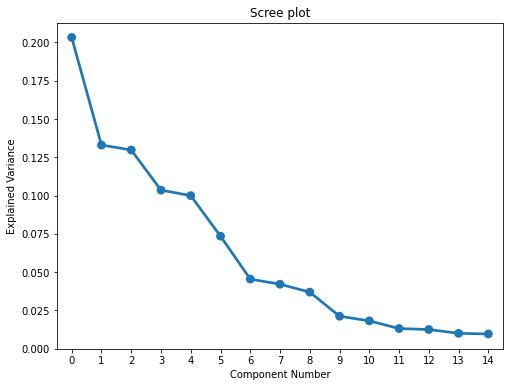

In [37]:
# Do a scree plot
ind = np.arange(0, n_pcs)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

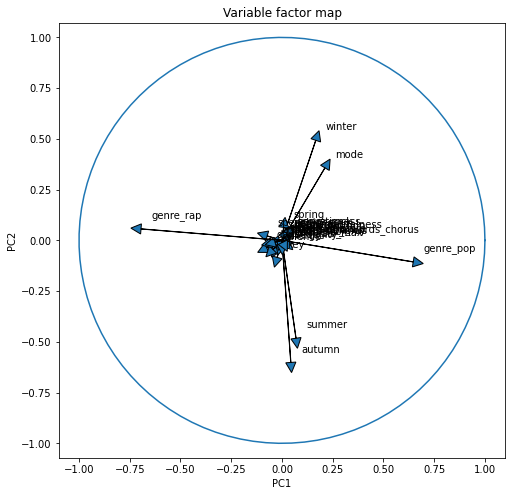

In [33]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.05,
             head_length=0.05)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()